In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
data_df = pd.read_csv("BitcoinHeistData.csv")

In [9]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000,princetonLocky


In [10]:
len(data_df['label'].unique())

29

In [11]:
data_df.shape

(1048575, 10)

In [12]:
data_df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.012048e+03,1.735295e+02,2.631742e+01,5.406222e-01,1.582070e+02,3.608665e+01,2.324220e+00,9.026240e+09
std,1.005057e+00,1.001409e+02,4.272004e+01,2.990846e+00,6.024127e+02,2.884734e+02,1.862359e+01,2.555851e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.610000e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.011000e+03,8.800000e+01,0.000000e+00,1.897321e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.086922e+08
50%,2.012000e+03,1.710000e+02,6.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+08
75%,2.013000e+03,2.560000e+02,2.800000e+01,5.606003e-01,8.000000e+00,0.000000e+00,2.000000e+00,2.518000e+09
max,2.018000e+03,3.650000e+02,1.440000e+02,4.982885e+02,1.346200e+04,1.169300e+04,3.776000e+03,4.996440e+13


In [7]:
data_df.corr()

,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.140383,0.091772,0.031369,0.243637,0.088891,0.012219,-0.013735
day,-0.140383,1.000000,0.043422,-0.000952,-0.010989,-0.008651,0.001740,0.006916
length,0.091772,0.043422,1.000000,0.060180,0.662717,0.326880,0.080992,0.009642
weight,0.031369,-0.000952,0.060180,1.000000,0.101587,0.236314,0.763195,0.038858
count,0.243637,-0.010989,0.662717,0.101587,1.000000,0.478515,0.088426,-0.003557
looped,0.088891,-0.008651,0.326880,0.236314,0.478515,1.000000,0.192995,0.001996
neighbors,0.012219,0.001740,0.080992,0.763195,0.088426,0.192995,1.000000,0.084670
income,-0.013735,0.006916,0.009642,0.038858,-0.003557,0.001996,0.084670,1.000000


In [8]:
data_df.dtypes

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income         int64
label         object
dtype: object

In [13]:
data_df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [14]:
ransomware_list = ['princetonCerber','princetonLocky','montrealCryptoLocker',
                    'montrealCryptXXX','montrealWannaCry','montrealDMALockerv3', 'montrealCryptoTorLocker2015',
                    'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt','montrealDMALocker', 'montrealGlobe',
                    'montrealEDA2','montrealVenusLocker', 'montrealXTPLocker','montrealGlobev3', 'montrealJigSaw',
                    'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy','montrealCryptConsole', 'montrealGlobeImposter',
                    'montrealSam','montrealComradeCircle', 'montrealAPT',
                   'paduaCryptoWall','paduaKeRanger','paduaJigsaw']
data_df.replace(ransomware_list,'ransomeware',inplace = True)


In [15]:
data_df.replace('ransomeware',1,inplace = True)
data_df.replace('white',2,inplace = True)
data_df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441410e-04,1,0,1,100000000,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000,1
...,...,...,...,...,...,...,...,...,...,...
1048570,1LfcACYNGFQcmUKubH6G4M4BfqBTxxkgzs,2013,287,144,7.010000e-05,496,0,2,55000000,2
1048571,1KjB3Lg7SUPwrjbcLp6eSMgikJCqiA5sBM,2013,287,100,2.840000e-14,1,0,2,18049972389,2
1048572,1BLFGmeZE8tFNJBAwsk6pRkgSHrM2RoA8E,2013,287,4,2.500000e-01,1,0,2,156339306,2
1048573,1JZ1SGn2DNtxUqUXYC8ENLheiEvC5QxBCP,2013,287,2,2.000000e-01,1,0,2,5553650944,2


In [16]:
#data_df.drop(['address'],1,inplace = True)
label_encoder = preprocessing.LabelEncoder()
data_df['address']=label_encoder.fit_transform(data_df['address'])
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,10,2017,11,18,0.008333,1,0,2,100050000,1
1,42,2016,132,44,0.000244,1,0,1,100000000,1
2,57,2016,246,0,1.000000,1,0,2,200000000,1
3,78,2016,322,72,0.003906,1,0,2,71200000,1
4,108,2016,238,144,0.072848,456,0,1,200000000,1


In [17]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,10,2017,11,18,0.008333,1,0,2,100050000,1
1,42,2016,132,44,0.000244,1,0,1,100000000,1
2,57,2016,246,0,1.000000,1,0,2,200000000,1
3,78,2016,322,72,0.003906,1,0,2,71200000,1
4,108,2016,238,144,0.072848,456,0,1,200000000,1


In [14]:
data_df.corr()

,year,day,length,weight,count,looped,neighbors,income,label
year,1.000000,-0.140383,0.091772,0.031369,0.243637,0.088891,0.012219,-0.013735,-0.570677
day,-0.140383,1.000000,0.043422,-0.000952,-0.010989,-0.008651,0.001740,0.006916,-0.001843
length,0.091772,0.043422,1.000000,0.060180,0.662717,0.326880,0.080992,0.009642,-0.072716
weight,0.031369,-0.000952,0.060180,1.000000,0.101587,0.236314,0.763195,0.038858,-0.005887
count,0.243637,-0.010989,0.662717,0.101587,1.000000,0.478515,0.088426,-0.003557,-0.148647
looped,0.088891,-0.008651,0.326880,0.236314,0.478515,1.000000,0.192995,0.001996,-0.041483
neighbors,0.012219,0.001740,0.080992,0.763195,0.088426,0.192995,1.000000,0.084670,0.002700
income,-0.013735,0.006916,0.009642,0.038858,-0.003557,0.001996,0.084670,1.000000,0.006540
label,-0.570677,-0.001843,-0.072716,-0.005887,-0.148647,-0.041483,0.002700,0.006540,1.000000


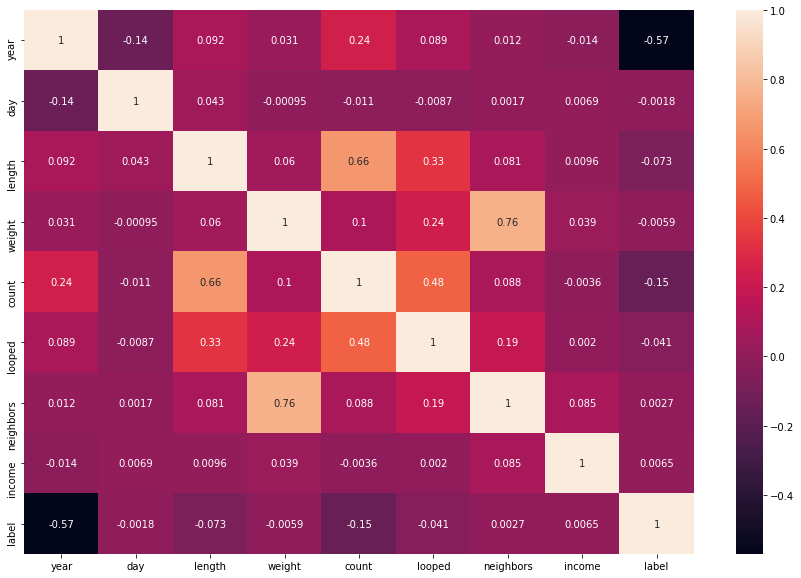

In [15]:
matrix = np.triu(data_df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data_df.corr(), annot=True)

In [16]:
minmax =MinMaxScaler()
data_minmax_df = minmax.fit_transform(data_df)

In [17]:
df_minmax = pd.DataFrame(data_df,columns =['year','day','length','weight','count','looped','neighbors','income','label'])
df_minmax

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,11,18,8.333333e-03,1,0,2,100050000,1
1,2016,132,44,2.441410e-04,1,0,1,100000000,1
2,2016,246,0,1.000000e+00,1,0,2,200000000,1
3,2016,322,72,3.906250e-03,1,0,2,71200000,1
4,2016,238,144,7.284841e-02,456,0,1,200000000,1
...,...,...,...,...,...,...,...,...,...
1048570,2013,287,144,7.010000e-05,496,0,2,55000000,2
1048571,2013,287,100,2.840000e-14,1,0,2,18049972389,2
1048572,2013,287,4,2.500000e-01,1,0,2,156339306,2
1048573,2013,287,2,2.000000e-01,1,0,2,5553650944,2


In [18]:
df_minmax.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.012048e+03,1.735295e+02,2.631742e+01,5.406222e-01,1.582070e+02,3.608665e+01,2.324220e+00,9.026240e+09,1.960505e+00
std,1.005057e+00,1.001409e+02,4.272004e+01,2.990846e+00,6.024127e+02,2.884734e+02,1.862359e+01,2.555851e+11,1.947685e-01
min,2.011000e+03,1.000000e+00,0.000000e+00,3.610000e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,1.000000e+00
25%,2.011000e+03,8.800000e+01,0.000000e+00,1.897321e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.086922e+08,2.000000e+00
50%,2.012000e+03,1.710000e+02,6.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,5.000000e+08,2.000000e+00
75%,2.013000e+03,2.560000e+02,2.800000e+01,5.606003e-01,8.000000e+00,0.000000e+00,2.000000e+00,2.518000e+09,2.000000e+00
max,2.018000e+03,3.650000e+02,1.440000e+02,4.982885e+02,1.346200e+04,1.169300e+04,3.776000e+03,4.996440e+13,2.000000e+00


In [19]:
df_zscore=pd.DataFrame(stats.zscore(df_minmax))

In [20]:
df_zscore

,0,1,2,3,4,5,6,7,8
0,4.926705,-1.623010,-0.194696,-0.177973,-0.260962,-0.125095,-0.017409,-0.034925,-4.931526
1,3.931735,-0.414711,0.413918,-0.180677,-0.260962,-0.125095,-0.071104,-0.034925,-4.931526
2,3.931735,0.723686,-0.616044,0.153595,-0.260962,-0.125095,-0.017409,-0.034533,-4.931526
3,3.931735,1.482617,1.069348,-0.179453,-0.260962,-0.125095,-0.017409,-0.035037,-4.931526
4,3.931735,0.643799,2.754741,-0.156402,0.494334,-0.125095,-0.071104,-0.034533,-4.931526
...,...,...,...,...,...,...,...,...,...
1048570,0.946827,1.133110,2.754741,-0.180736,0.560734,-0.125095,-0.017409,-0.035101,0.202777
1048571,0.946827,1.133110,1.724779,-0.180759,-0.260962,-0.125095,-0.017409,0.035306,0.202777
1048572,0.946827,1.133110,-0.522411,-0.097171,-0.260962,-0.125095,-0.017409,-0.034704,0.202777
1048573,0.946827,1.133110,-0.569228,-0.113888,-0.260962,-0.125095,-0.017409,-0.013587,0.202777


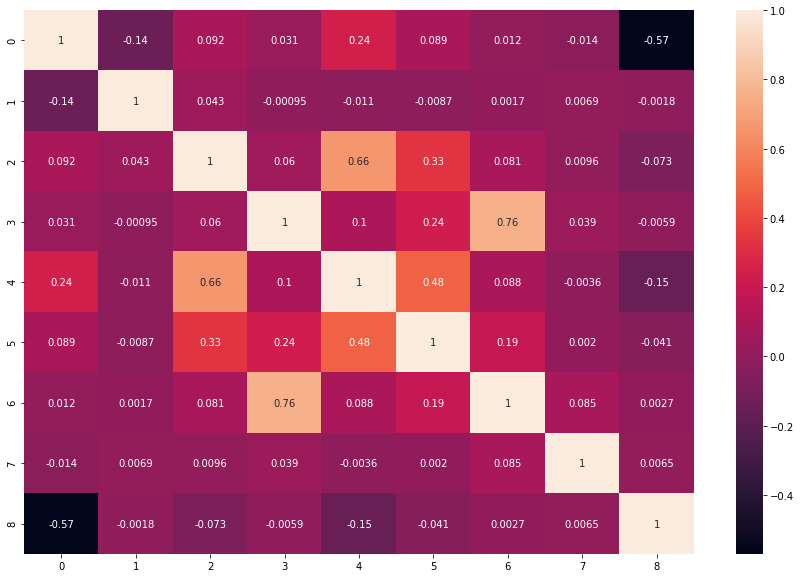

In [21]:
matrix = np.triu(df_zscore.corr())
plt.figure(figsize = (15,10))
sns.heatmap(df_zscore.corr(), annot=True)

In [22]:
X = np.array(data_df.drop(['label'],1))
y = np.array(data_df['label'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Random Forest**


In [23]:
X=data_df.drop('label',axis=1)
y=data_df['label']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(max_depth=3,random_state=2)
rf=rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9921369477624395